In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


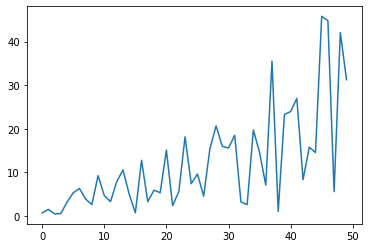

In [2]:

# 50개의 Random 시계열 생성
list_a = np.random.rand(50)

# idx만큼 증가하는 추세를 추가
list_a = [(idx+1) * val for idx, val in enumerate(list_a)]
plt.plot(list_a)
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

In [5]:
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    
    return p_value

print('pvalue =', adf_test(list_a))

pvalue = 0.9989223756685559


비정상임

In [7]:
from pmdarima.arima import ndiffs

In [8]:
kpss_diffs = ndiffs(list_a, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(list_a, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f" d = {n_diffs}")

 d = 1


In [9]:
print('pvalue =', adf_test(list_a)) #정상성 다시 확인

pvalue = 0.9989223756685559


여전히 비정상

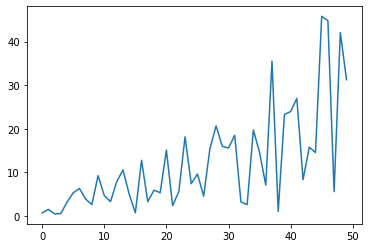

In [13]:
plt.plot(list_a)
plt.show()

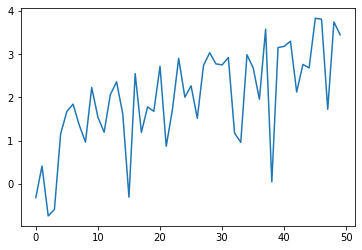

In [14]:
list_a = np.log(list_a) #로그
plt.plot(list_a)
plt.show()

In [15]:
print('pvalue =', adf_test(list_a)) #정상성 다시 확인

pvalue = 5.246713159709495e-05


정상임 

In [18]:
import pandas as pd

In [27]:
data = pd.DataFrame([list_a])
data = data.transpose()
data =data.dropna()
data

,0
1,-0.887841
4,0.142764
5,0.514217
6,0.610317
7,0.304277
8,-0.035321
9,0.799854
10,0.433150
11,0.176055
12,0.722564


In [28]:
data = np.log(data) #로그 한 번 더?

C:\Users\mirae\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [29]:
#로그 두 번 하려하니까 경고뜨네 